# Signature Time Series Clustering

In [1]:
# Native libraries
import os
import math

# # Essential Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Preprocessing
from sklearn.preprocessing import MinMaxScaler

# Algorithms
from tslearn.barycenters import dtw_barycenter_averaging
from tslearn.clustering import TimeSeriesKMeans
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

c:\Users\Pakorn Kongrit\miniconda3\lib\site-packages\tslearn\bases\bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [2]:
from tqdm import tqdm

## Load time series data from CSV file

In [3]:
my_signatures = []
signature_names = []

series_directory = "/time_series_data/"
sign_ids = list(range(1, 56))
count_per_sign = 24

pbar = tqdm(total=len(sign_ids) * count_per_sign)
for i in sign_ids:
    for j in range(1, count_per_sign + 1):
        with open(f"time_series_data/{i}/{j}.csv") as f:
            line = f.readline()
            if line is not None:
                intensities = [int(y) for y in line.split(',')]
                signature_series = pd.DataFrame({
                    "intensity": intensities
                })
                signature_series.index.name = "x"
                my_signatures.append(signature_series)
                signature_names.append(f"signature_{i}_{j}")
        pbar.update(1)
pbar.close()

100%|██████████| 1320/1320 [00:01<00:00, 718.47it/s]


## Plot Df

In [4]:
from numpy.random import default_rng

In [5]:
cluster_num = 55
sample_size = 5 

In [9]:
tmp = []
selected_series = []
selected_series_names = []
rng = default_rng(1234)

for i in tqdm(range(cluster_num)):
    
    rints = rng.choice(a=range(i*count_per_sign, (i+1)*count_per_sign), size=sample_size, replace=False)
    for j in range(sample_size):
        tmp.append((my_signatures[rints[j]], signature_names[rints[j]]))

rng.shuffle(tmp, axis=0)

for i in range(cluster_num * sample_size):
    series, name = tmp[i]
    selected_series.append(series)
    selected_series_names.append(name)

100%|██████████| 55/55 [00:00<00:00, 18381.41it/s]


In [ ]:
for i in range(0, cluster_num * sample_size, sample_size):
    fig, axs = plt.subplots(1, sample_size,figsize=(20, 5))
    for j in range(sample_size):
        axs[j].plot(selected_series[i+j].values)
        axs[j].set_title(selected_series_names[i+j])
    plt.show()

## Preprocessing

In [11]:
# check if the series have same length
series_lengths = {len(series) for series in selected_series}
print(series_lengths)

{640}


In [12]:
for i in range(len(selected_series)):
    scaler = MinMaxScaler()
    selected_series[i] = MinMaxScaler().fit_transform(selected_series[i])
    selected_series[i]= selected_series[i].reshape(len(selected_series[i]))

## K-Mean Clustering 

In [13]:
cluster_count = 55

In [17]:
# A good rule of thumb is choosing k as the square root of the number of points in the training data set in kNN

km = TimeSeriesKMeans(
    n_clusters=cluster_count,
    metric="dtw",
    verbose=True,
    n_jobs=4)

km.fit(selected_series)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 275 out of 275 | elapsed:    2.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Done 1650 out of 1650 | elapsed:    4.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parall

2.378 --> 

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    2.7s
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:    4.3s
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed:    6.3s
[Parallel(n_jobs=4)]: Done 3192 tasks      | elapsed:    8.4s
[Parallel(n_jobs=4)]: Done 4042 tasks      | elapsed:   10.7s
[Parallel(n_jobs=4)]: Done 4992 tasks      | elapsed:   13.2s
[Parallel(n_jobs=4)]: Done 6042 tasks      | elapsed:   15.9s
[Parallel(n_jobs=4)]: Done 7192 tasks      | elapsed:   19.0s
[Parallel(n_jobs=4)]: Done 8442 tasks      | elapsed:   22.6s
[Parallel(n_jobs=4)]: Done 9792 tasks      | elapsed:   26.5s
[Parallel(n_jobs=4)]: Done 11242 tasks      | elapsed:  

1.360 --> 

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.5s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    3.9s
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:    5.6s
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed:    7.7s
[Parallel(n_jobs=4)]: Done 3192 tasks      | elapsed:   10.1s
[Parallel(n_jobs=4)]: Done 4042 tasks      | elapsed:   12.8s
[Parallel(n_jobs=4)]: Done 4992 tasks      | elapsed:   15.3s
[Parallel(n_jobs=4)]: Done 6042 tasks      | elapsed:   18.3s
[Parallel(n_jobs=4)]: Done 7192 tasks      | elapsed:   21.7s
[Parallel(n_jobs=4)]: Done 8442 tasks      | elapsed:   25.8s
[Parallel(n_jobs=4)]: Done 9792 tasks      | elapsed:   29.7s
[Parallel(n_jobs=4)]: Done 11242 tasks      | elapsed:  

1.344 --> 

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    3.4s
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:    5.0s
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed:    7.2s
[Parallel(n_jobs=4)]: Done 3192 tasks      | elapsed:    9.6s
[Parallel(n_jobs=4)]: Done 4042 tasks      | elapsed:   12.6s
[Parallel(n_jobs=4)]: Done 4992 tasks      | elapsed:   15.4s
[Parallel(n_jobs=4)]: Done 6042 tasks      | elapsed:   19.1s
[Parallel(n_jobs=4)]: Done 7192 tasks      | elapsed:   22.8s
[Parallel(n_jobs=4)]: Done 8442 tasks      | elapsed:   26.8s
[Parallel(n_jobs=4)]: Done 9792 tasks      | elapsed:   31.0s
[Parallel(n_jobs=4)]: Done 11242 tasks      | elapsed:  

1.341 --> 

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    3.3s
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:    5.2s
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed:    7.4s
[Parallel(n_jobs=4)]: Done 3192 tasks      | elapsed:   10.3s
[Parallel(n_jobs=4)]: Done 4042 tasks      | elapsed:   12.9s
[Parallel(n_jobs=4)]: Done 4992 tasks      | elapsed:   15.8s
[Parallel(n_jobs=4)]: Done 6042 tasks      | elapsed:   19.2s
[Parallel(n_jobs=4)]: Done 7192 tasks      | elapsed:   22.4s
[Parallel(n_jobs=4)]: Done 8442 tasks      | elapsed:   26.5s
[Parallel(n_jobs=4)]: Done 9792 tasks      | elapsed:   30.8s
[Parallel(n_jobs=4)]: Done 11242 tasks      | elapsed:  

1.341 --> 

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    3.0s
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:    4.7s
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed:    7.2s
[Parallel(n_jobs=4)]: Done 3192 tasks      | elapsed:    9.8s
[Parallel(n_jobs=4)]: Done 4042 tasks      | elapsed:   12.9s
[Parallel(n_jobs=4)]: Done 4992 tasks      | elapsed:   16.3s
[Parallel(n_jobs=4)]: Done 6042 tasks      | elapsed:   19.3s
[Parallel(n_jobs=4)]: Done 7192 tasks      | elapsed:   22.8s
[Parallel(n_jobs=4)]: Done 8442 tasks      | elapsed:   27.4s
[Parallel(n_jobs=4)]: Done 9792 tasks      | elapsed:   32.1s
[Parallel(n_jobs=4)]: Done 11242 tasks      | elapsed:  

1.341 --> 


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    3.2s
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:    5.0s
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed:    7.2s
[Parallel(n_jobs=4)]: Done 3192 tasks      | elapsed:    9.7s
[Parallel(n_jobs=4)]: Done 4042 tasks      | elapsed:   12.5s
[Parallel(n_jobs=4)]: Done 4992 tasks      | elapsed:   15.4s
[Parallel(n_jobs=4)]: Done 6042 tasks      | elapsed:   18.3s
[Parallel(n_jobs=4)]: Done 7192 tasks      | elapsed:   22.0s
[Parallel(n_jobs=4)]: Done 8442 tasks      | elapsed:   26.1s
[Parallel(n_jobs=4)]: Done 9792 tasks      | elapsed:   30.4s
[Parallel(n_jobs=4)]: Done 11242 tasks      | elapsed:  

TimeSeriesKMeans(metric='dtw', n_clusters=55, n_jobs=4, verbose=True)

In [14]:
import pickle

In [21]:
model_file = open('kmean.model', 'wb')

# Save Decision tree model
pickle.dump(km, model_file)

# Close file
model_file.close()

Open model

In [15]:
model_file = open('kmean.model', 'rb')

# Load your model
km = pickle.load(model_file)

# Close file
model_file.close()

In [16]:
labels = km.predict(selected_series)

c:\Users\Pakorn Kongrit\miniconda3\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 275 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    3.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    4.0s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    5.2s
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:    6.9s
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed:    9.0s
[Parallel(n_jobs=4)]: Done 3192 tasks      | elapsed:   11.3s
[Parallel(n_jobs=4)]: Done 4042 tasks      | elapsed:   13.9s
[Parallel(n_jobs=4)]: Done 4992 tasks      | elapsed:   17.1s
[Parallel(n_jobs=4)]: Done 6042 tasks      | elapsed:   20.5s
[Parallel

In [17]:
clusterSignatureDict = {}

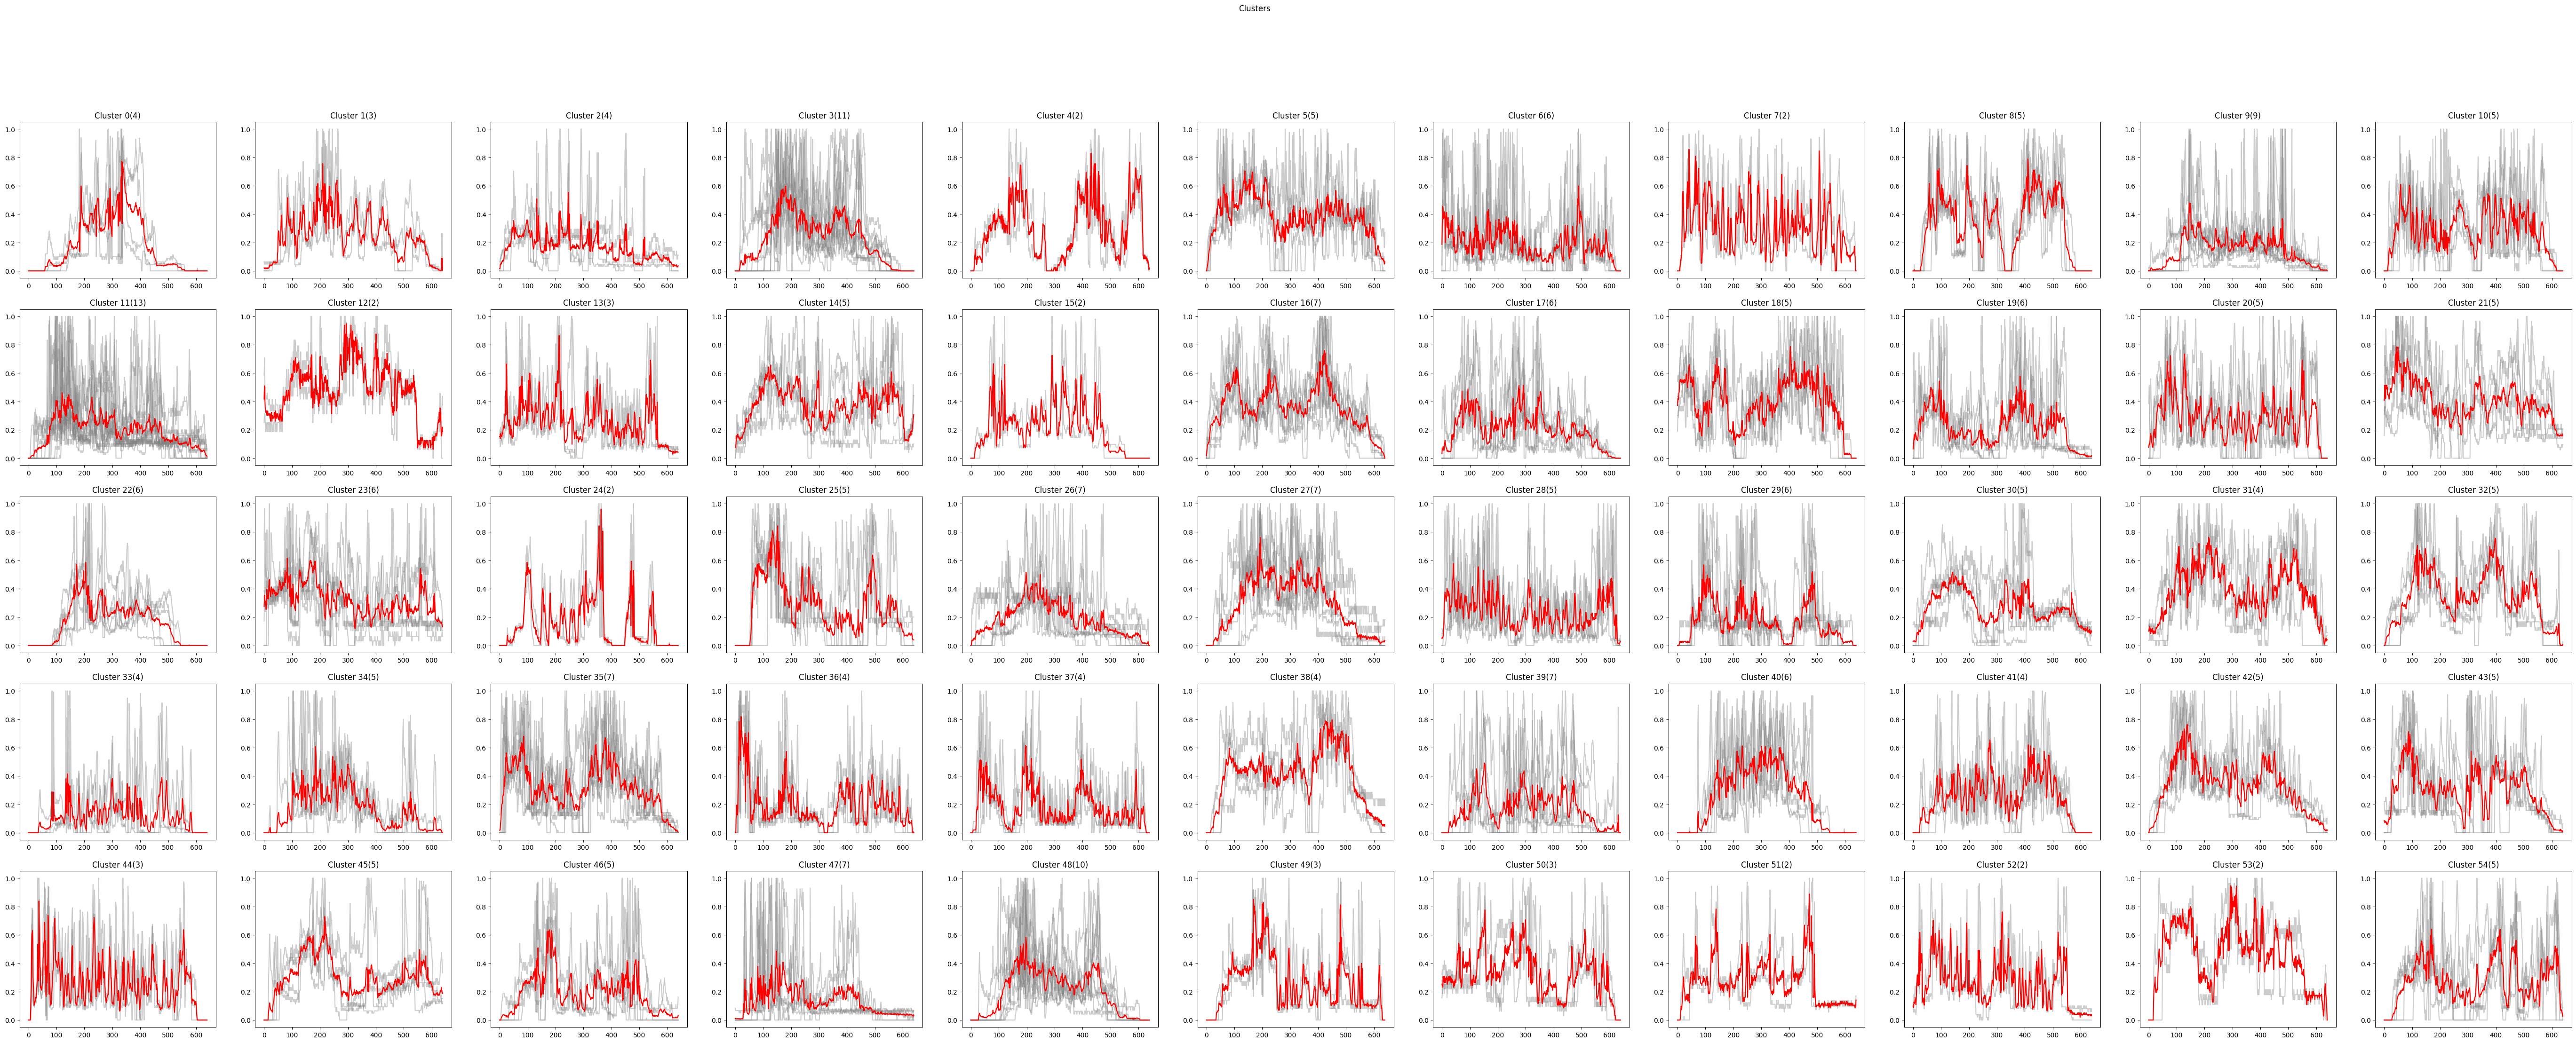

In [18]:
fig, axs = plt.subplots(5, 11, figsize=(70,25))
fig.suptitle('Clusters')
row_i=0
column_j=0
# For each label there is,
# plots every series with that labels
for label in set(labels):
    cluster = []
    clusterSignature = []
    for i in range(len(labels)):
        if(labels[i]==label):
            axs[row_i, column_j].plot(selected_series[i],c="gray",alpha=0.4)
            cluster.append(selected_series[i])
            clusterSignature.append(i)

    if len(cluster) > 0:
        axs[row_i, column_j].plot(np.average(cluster, axis=0),c="red")

    axs[row_i, column_j].set_title("Cluster "+str(row_i * 11 + column_j)+f"({len(cluster)})")
    column_j+=1
    if column_j% 11 == 0:
        row_i+=1
        column_j=0
    
    clusterSignatureDict[label] = clusterSignature

plt.show()

Plot Cluster

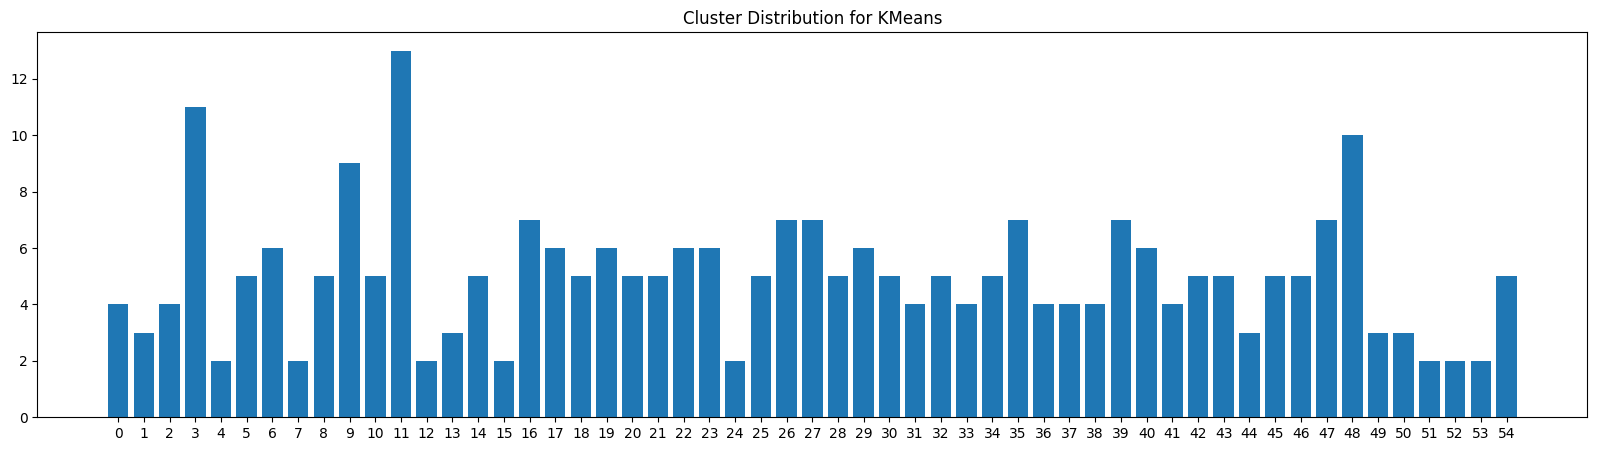

In [19]:
cluster_c = [len(labels[labels==i]) for i in range(cluster_count)]
cluster_n = [ str(i) for i in range(cluster_count)]
plt.figure(figsize=(20,5))
plt.title("Cluster Distribution for KMeans")
plt.bar(cluster_n,cluster_c)
plt.show()

## Visualize Series in each cluster

In [20]:
type(labels)

numpy.ndarray

In [22]:
for k in range(55):
    idxs = []
    for j in range(len(labels)):
        if (labels[j]==k):
            idxs.append(j)
            
    columns_num = len(idxs)
    fig, axs = plt.subplots(1, columns_num, figsize=(8 * columns_num, 4))
    if len(idxs) == 1:
        axs.plot(selected_series[idxs[0]])
        axs.set_title(selected_series_names[idxs[0]])
    elif len(idxs) <= 0:
        print("something is wrong")
        continue
    else:
        for i, idx in enumerate(idxs):
            axs[i].plot(selected_series[idx])
            axs[i].set_title(selected_series_names[idx])
    fig.suptitle('Cluster-' + str(k))
    plt.savefig(f'clusters/cluster-{k}.png')
    plt.close()

## Calculate Error rate

In [23]:
def majorityVote(signatureGroup):
    majorityDict = {}
    for value in signatureGroup:
        if value in majorityDict:
            majorityDict[value] += 1    
        else:
            majorityDict[value] = 1
    mx = max(majorityDict, key= lambda x: majorityDict[x])
    return mx, majorityDict[mx]

In [24]:
errorCount = 0 

In [25]:
majorityGroupDict = {}

In [26]:
for index,value in clusterSignatureDict.items() :
    errorInThisCluster = 0
    signatureGroups = list(map(lambda i:selected_series_names[i].split("_")[1],value))
    if (len(signatureGroups) == 1):
        print(f"Cluster that have 1 is {index} and it's real signature group is {signatureGroups[0]}")
    majorityGroup, support = majorityVote(signatureGroups)
    for signatureGroup in signatureGroups:
        if signatureGroup != majorityGroup :
            errorInThisCluster += 1
    errorCount += errorInThisCluster
    print(f"Cluster {index} majority Group is {majorityGroup} has error {errorInThisCluster} from total {len(value)} which is {errorInThisCluster/len(value)*100} %")
    if majorityGroup not in majorityGroupDict:
        majorityGroupDict[majorityGroup] = []
    majorityGroupDict[majorityGroup].append((index,support))

Cluster 0 majority Group is 27 has error 1 from total 4 which is 25.0 %
Cluster 1 majority Group is 31 has error 0 from total 3 which is 0.0 %
Cluster 2 majority Group is 50 has error 1 from total 4 which is 25.0 %
Cluster 3 majority Group is 22 has error 6 from total 11 which is 54.54545454545454 %
Cluster 4 majority Group is 47 has error 0 from total 2 which is 0.0 %
Cluster 5 majority Group is 9 has error 0 from total 5 which is 0.0 %
Cluster 6 majority Group is 53 has error 1 from total 6 which is 16.666666666666664 %
Cluster 7 majority Group is 2 has error 0 from total 2 which is 0.0 %
Cluster 8 majority Group is 4 has error 0 from total 5 which is 0.0 %
Cluster 9 majority Group is 20 has error 4 from total 9 which is 44.44444444444444 %
Cluster 10 majority Group is 32 has error 0 from total 5 which is 0.0 %
Cluster 11 majority Group is 46 has error 8 from total 13 which is 61.53846153846154 %
Cluster 12 majority Group is 39 has error 0 from total 2 which is 0.0 %
Cluster 13 major

In [31]:
duplicatedMajority = [x[0] for x in majorityGroupDict.items() if len(x[1]) > 1]
print(duplicatedMajority)

['47', '2', '39', '13', '17', '49']


In [32]:
for majority in duplicatedMajority:
    maxValue = np.max([x[1] for x in majorityGroupDict[majority]])
    for value in majorityGroupDict[majority]:
        if value[1] != maxValue:
            errorCount += value[1]

In [33]:
print(f"Error rate is {errorCount/len(selected_series)*100} %")

Error rate is 27.636363636363637 %
